# Tarea 1
Felipe González Poblete

### Parte a)
Usando el modelo de átomo de Hidrogeno:

Encuentre los valores de los primeros tres niveles de energía (n = 1,2,3) tanto en [J] como en [eV]

In [106]:
import numpy as np
from scipy.special import genlaguerre, sph_harm, factorial
from scipy.constants import hbar, m_e, pi, e, epsilon_0
from scipy.integrate import dblquad
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [107]:
# Definición de energía de ionización:

E_0 = 13.6 # esto se encuentra en [eV]
Ej_0 = E_0 * e # energía de ionización de un electron de hidrógeno en [J]

def E(n,E0):
    """ Calcula la energía de un electron de un átomo de hidrógeno en la capa n
    """
    return -E0/(n**2)

for n in range(1,4):
    print(f'energía en el nivel {n} (en [eV]): {E(n,E_0):.2f} [eV]')
    print(f'energía en el nivel {n} (en [J]): {E(n,Ej_0)} [J]\n')
    



energía en el nivel 1 (en [eV]): -13.60 [eV]
energía en el nivel 1 (en [J]): -2.1789602222399996e-18 [J]

energía en el nivel 2 (en [eV]): -3.40 [eV]
energía en el nivel 2 (en [J]): -5.447400555599999e-19 [J]

energía en el nivel 3 (en [eV]): -1.51 [eV]
energía en el nivel 3 (en [J]): -2.4210669136e-19 [J]



Se debe programar la siguiente función:

$$
\psi_{nlm}(r,\theta,\phi) = \sqrt{\left(\frac{2}{nr_0}\right)^3 \frac{(n-l-1)!}{2n(n+l)!}} \: e^{-r/nr_0} \left(\frac{2r}{nr_0}\right)^l \mathcal{L}^{2l+1}_{n-l-1}\left(\frac{2r}{nr_0}\right) \mathcal{Y}^m_l(\theta, \phi)
$$

In [108]:
r_0 = (4 * pi * epsilon_0 * hbar ** 2) /(m_e * e**2) # cálculo de radio r_0

def C(b,n,l):
    return np.sqrt(factorial(n-l-1)/(2 * n * factorial(n+l)) * (b)**3)

def radial(r,n,l,m):
    b = 2 / (n * r_0)
    c = C(b,n,l)
    raiz = np.sqrt(c * b ** 3 )
    exponencial = np.exp(-b*r/2)
    lag = genlaguerre(n-l-1, 2*l+1)(b*r)
    return raiz * exponencial * ((b*r)**l) * lag

def angular(theta, phi,n,l,m):
    return sph_harm(m,l,theta,phi)

def psi(r, theta, phi, r_0, n, l, m):
    return radial(r,n,l,m) * angular(theta,phi,n,l,m)

La función $\psi_{nlm}$ puede ser expresada como:

$$
\psi_{nlm} = R_{nlm}(r)\cdot \Phi_nlm(\theta,\phi)
$$

Siendo la parte radial:

$$
R_{nlm}(r)=\sqrt{\left(\frac{2}{nr_0}\right)^3 \frac{(n-l-1)!}{2n(n+l)!}} \: e^{-r/nr_0} \left(\frac{2r}{nr_0}\right)^l \mathcal{L}^{2l+1}_{n-l-1}\left(\frac{2r}{nr_0}\right)
$$

Y la parte angular:

$$
\Phi_{nlm}(\theta,\phi) = \mathcal{Y}^m_l(\theta, \phi)
$$

La probabilidad de un radio $dr$ para $m=l=0$ puede ser visto como:

$$
P(r) = \int_0^{\pi} \int_0^{2\pi} |\psi_{n00}(r, \theta, \phi)|^2 r^2 sen(\theta) d\phi d\theta
$$

Desarrollando:
$$
P(r) = \int_0^{\pi} \int_0^{2\pi} |R_{n00}(r)|^2|\Phi(\theta, \phi)|^2 r^2 sen(\theta) d\phi d\theta \\
$$
$$
P(r) = |r\cdot R_{n00}(r)|^2\int_0^{\pi} \int_0^{2\pi} |\Phi(\theta, \phi)|^2 sen(\theta) d\phi d\theta \\
$$
$$
P(r) = |r\cdot R_{n00}(r)|^2\int_0^{\pi} \int_0^{2\pi} |\mathcal{Y}^0_0(\theta, \phi)|^2 sen(\theta) d\phi d\theta \\
$$

Sabiendo que $\mathcal{Y}_0^0(\theta,\phi)=\frac{1}{2}\frac{1}{\sqrt{\pi}}\Rightarrow |\mathcal{Y}_0^0(\theta,\phi)|^2 = \frac{1}{4\pi}$ 

$$
P(r) = \frac{1}{4\pi} |r\cdot R_{n00}(r)|^2\int_0^{\pi} \int_0^{2\pi} sen(\theta) d\phi d\theta \\
$$
$$
P(r) = \frac{1}{4\pi} |r\cdot R_{n00}(r)|^2\int_0^{\pi} 2\pi sen(\theta) d\theta \\
$$
$$
P(r) = \frac{1}{4\pi} |r\cdot R_{n00}(r)|^2(-2\pi cos(\theta) |_0^{\pi}) \\
$$
$$
P(r) = \frac{1}{4\pi} |r\cdot R_{n00}(r)|^2 4\pi \\
$$
$$
P(r) = |r\cdot R_{n00}(r)|^2
$$



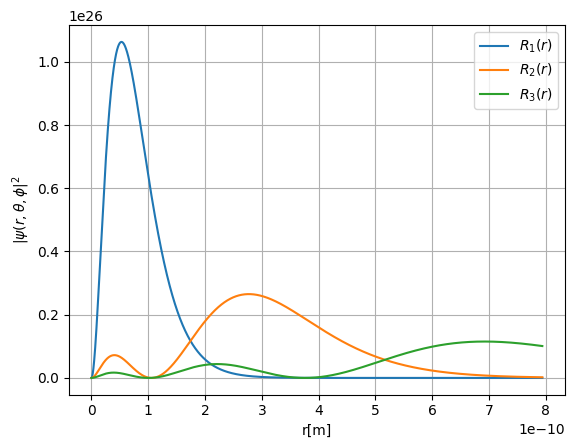

In [109]:

I = np.linspace(0, 15 * r_0, 10000)

for n in range(1,4):
    R_n00 = I**2 * abs( radial(I, n, 0, 0)) ** 2
    plt.plot(I,R_n00,label=rf"$R_{n}(r)$")
plt.xlabel("r[m]")
plt.ylabel(r"$|\psi(r,\theta,\phi|^2$")
plt.grid(True)
plt.legend(loc='best')
plt.show()


